In [1]:
import sys
import os 
sys.path.append(os.path.join(os.getcwd(), ".."))
print(sys.path)

"hi"

['c:\\Users\\jonat\\Documents\\Studium\\Angewandte Statistik\\4.Semester\\MA\\repos\\tree_learning\\data\\chunks', 'c:\\Programme2\\miniconda\\envs\\standard_py3.9\\python39.zip', 'c:\\Programme2\\miniconda\\envs\\standard_py3.9\\DLLs', 'c:\\Programme2\\miniconda\\envs\\standard_py3.9\\lib', 'c:\\Programme2\\miniconda\\envs\\standard_py3.9', '', 'c:\\Programme2\\miniconda\\envs\\standard_py3.9\\lib\\site-packages', 'c:\\Programme2\\miniconda\\envs\\standard_py3.9\\lib\\site-packages\\win32', 'c:\\Programme2\\miniconda\\envs\\standard_py3.9\\lib\\site-packages\\win32\\lib', 'c:\\Programme2\\miniconda\\envs\\standard_py3.9\\lib\\site-packages\\Pythonwin', 'c:\\Users\\jonat\\Documents\\Studium\\Angewandte Statistik\\4.Semester\\MA\\repos\\tree_learning\\data\\chunks\\..']


In [2]:
import yaml

In [5]:
from generate import *

ModuleNotFoundError: No module named 'yaml'

In [3]:
os.chdir("..")
config = read_yaml("datasets/test_generator.yaml")
print(config)
if os.path.exists(config.sample_path):
    [os.remove(os.path.join(config.sample_path, path)) for path in os.listdir(config.sample_path)]
if not os.path.exists(config.sample_path):
    os.mkdir(config.sample_path)



Namespace(fill_holes_how_far=3, inner_edge=15, min_occupied=0.8, normalize=True, number_occupancy_points=100000, occupancy_resolution=1, outer_edge=7, plot_path='data/forest/forest_labeled_cleanest2.npy', remove_background=True, sample_path='data/trees/tmp', save_config=True, save_labels=True, voxel_size=0.1, voxelize=True)


In [4]:
obj = SampleGenerator(config)
obj.regular_generate()

Voxelize the point cloud with a voxel size of 0.1
Previous size: 5468352, new size 2484726


In [5]:
obj.occupancy = obj.occupancy_grid()

Adjusted resolution from 1 to 1.002891089108911
Adjusted resolution from 1 to 1.0084329896907216


[1.         1.         1.         0.99369748 0.39956803 1.
 0.95407098 0.24444444 0.76890756 1.         1.         1.
 0.41596639 0.80761099 1.         0.6918239  1.         1.
 1.         1.         0.91440501 0.63368421 1.         1.
 1.         1.         0.92307692 0.99788136 0.23529412 0.96025105
 0.55793991 1.         0.42138365 1.         1.         0.49685535
 1.         1.         1.         1.         0.65828092 1.
 1.         0.3131524  1.         0.98535565 1.         1.
 1.         0.55439331 0.76100629 0.50431034 1.         0.99380165
 1.         0.94989562 1.         0.93514644 1.         0.95
 1.         0.45208333 0.97077244 0.86875    1.         0.98121086
 1.         1.         1.         1.         1.         0.39874739
 0.91631799 1.         1.         1.         0.98538622 0.96049896
 1.         1.         1.         0.92662474 0.60421053 0.53138075
 0.63002114 1.         0.97920998 0.97286013 0.56158664 1.
 0.80375783 0.78991597 0.5190678  0.85774059 0.66806723 0

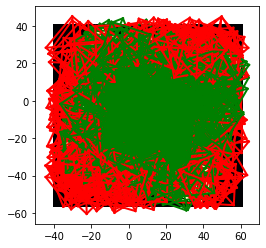

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
vertices, boolean, rotations, centers, vertices_unrotated = obj.random_generate(500)
extent = [*obj.x_range, *obj.y_range]
plt.clf()
plt.imshow(obj.occupancy[:,:,2].T, extent=extent, interpolation='nearest', origin="lower", cmap=cm.magma)
for sample, approved in zip(vertices, boolean):
    for row1, row2 in itertools.combinations(sample, 2):
        col = "g" if approved else "r"
        plt.plot([row1[0], row2[0]], [row1[1], row2[1]], color=col, linestyle='-', linewidth=2)


plt.show()

In [8]:
paths = obj.save(vertices[boolean], rotations[boolean], centers[boolean], vertices_unrotated[boolean])

In [10]:
len(paths)

358

In [ ]:
from custom import plot
import numpy as np

In [ ]:
points = np.load(paths[1])
i = 0
plot.explore(points, write=False, i=i)